# One Hidden Layer Neural Network(Make-Moon Dataset)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
Random_State=2020

## Import Dataset

In [3]:
def Import_Data():
    X,y=datasets.make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=Random_State)
    df=pd.DataFrame(X,columns=["A","B"])
    df["y"]=y
    return df

## Visualisation

In [38]:
def Plot_Data(data):
    sns.scatterplot(x=data.A,y=data.B,hue=data.iloc[:,-1])
    plt.show()
    return 

In [39]:
def Plot_Compare(data):
    fig, ax=plt.subplots(ncols=2,figsize=(10,5))
#     Plot_Data(train_y_pred.drop("y",axis=1))
    sns.scatterplot(x=data.A,y=data.B,hue=data.y,ax=ax[0])
    plt.title("Predicted Data")
    sns.scatterplot(x=data.A,y=data.B,hue=data.y_hat,ax=ax[1])
    plt.show()
    return 

In [95]:
def Show_Loss_Graph(loss):
    keys=list(loss.keys())
    values=list(loss.values())
    plt.xlabel("n Epoch")
    plt.ylabel("Loss")
    print("Starting Loss : ",values[0])
    print("Ending Loss :",values[-1])
    sns.lineplot(x=keys,y=values)
    return 

In [93]:
Moons_Data=Import_Data()
Moons_Data.head()

,A,B,y
0,0.804598,-0.468950,1
1,1.789296,0.109182,1
2,1.459943,-0.539453,1
3,0.157389,-0.283131,1
4,-0.927171,-0.007073,0


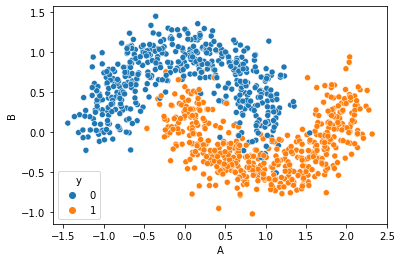

In [94]:
Plot_Data(Moons_Data)

##  Train Test Split

In [8]:
train,test=Moons_Data.iloc[:800],Moons_Data.iloc[800:]

## DataFrame To Store Results

In [58]:
Result_df=pd.DataFrame(columns=["Dimention of hidden layer","Learning Rate","Regularization","n_Epoch",
                                "Train_Accuracy","Test Accuracy","Comment"])

In [59]:
#To store result in the dataframe
def Save_Result(hidden_layer,Learning_Rate,Regularization,n_Epoch,Train_Accuracy,Test_Accuracy):
    global Result_df
    Remark=input("Please Enter Remark : ")
    result={"Dimention of hidden layer":hidden_layer,"Learning Rate":Learning_Rate,
            "Regularization":Regularization,"n_Epoch":n_Epoch,
                                "Train_Accuracy":Train_Accuracy,
                                "Test Accuracy":Test_Accuracy,"Comment":Remark}
    Result_df=Result_df.append(result,ignore_index=True)
    print("Data Saved")
    return True

## Calculate_Accuracy On dataset

In [49]:
def Calculate_Accuracy(model_,data_):
    data=data_.copy()
    y_hat=Predict_Function(model_,data.iloc[:,:-1])
    Accuracy=accuracy_score(data.iloc[:,-1],y_hat)
    print("Accuracy : ",Accuracy)
    data["y_hat"]=y_hat
    return data,Accuracy

## Predicting results based on model

In [11]:
def Predict_Function(model,X):
    # 2 Layer NN and Softmax function at the output layer
    """
        model={W1,B1,W2,B2}
        X= input features
    """
    
    W1,B1,W2,B2=model["W1"],model["B1"],model["W2"],model["B2"]
    
    # Hidden Layer (1st Layer)
    Z1=np.dot(X,W1)+B1
    a1=np.tanh(Z1)

    # Hidden Layer (1st Layer)
    Z2=np.dot(a1,W2)+B2
    
    #output Layer -> Softmax
    exp_op=np.exp(Z2)
    
    #To calculate probabilities
    proba=exp_op/np.sum(exp_op,axis=1,keepdims=True)
#     print("np.argmax(proba) : ",np.argmax(proba))
    return np.argmax(proba,axis=1)
    

## Calculate loss on whole dataset

In [23]:
def Calculate_Loss_Function(model,X,y):
    # Function to calculate loss on whole dataset
    
    W1,B1,W2,B2=model["W1"],model["B1"],model["W2"],model["B2"]
    
    # Hidden Layer (1st Layer)
    Z1=np.dot(X,W1)+B1
    a1=np.tanh(Z1)
    
    # Hidden Layer (1st Layer)
    Z2=np.dot(a1,W2)+B2
    
    #output Layer -> Softmax
    exp_op=np.exp(Z2)
    
    #To calculate probabilities
    proba=exp_op/np.sum(exp_op,axis=1,keepdims=True)
    
    #Calculate Correct loss 
    log_proba=-np.log(proba[range(num_examples),y])
    loss=np.sum(log_proba)
    
    #
    loss+=(lambda_/2) *(np.sum(np.square(W1))+np.sum(np.square(W2)))
    loss/=num_examples
    return loss.values[0]

## Train Model

In [141]:
def Train_Model(NN_hidden_Layer,NN_Output_Layer,X,y,Epoch=1000,Print_Loss=False):
#     print("X : ",X)
#     print("y : ",y)
        

    np.random.seed(Random_State)
    # Save weights to return
    model={}
    
    # Intializing weights
    W1=np.random.randn(X.shape[1],NN_hidden_Layer)/np.sqrt(NN_hidden_Layer)
    B1=np.zeros((1,NN_hidden_Layer))
    W2=np.random.randn(NN_hidden_Layer,NN_Output_Layer)/np.sqrt(NN_Output_Layer)
    B2=np.zeros((1,NN_Output_Layer))

    ## Forword Propagation
    for i in range(Epoch):
        # Hidden Layer (1st Layer)
        Z1=np.dot(X,W1)+B1
        a1=np.tanh(Z1)
        
        # Hidden Layer (1st Layer)
        Z2=np.dot(a1,W2)+B2

        #output Layer -> Softmax
        exp_op=np.exp(Z2)

        #To calculate probabilities
        proba=exp_op/np.sum(exp_op,axis=1,keepdims=True)
        
        ## Back propagation
        dz2=proba
        
        #Calculate Correct loss 
        
        dz2[range(num_examples),y]-=1 #------------1 
        
        dW2=(1/num_examples)*(a1.T).dot(dz2)#------2

        assert (W2.shape==dW2.shape) ,"Shape of W2={} and dW2 ={} doesn't match".format(W2.shape,dW2.shape)
        
        dB2=(1/num_examples)*np.sum(dz2,axis=0,keepdims=True)
        
        assert (B2.shape==dB2.shape) ,"Shape of B2={} and dB2 ={} doesn't match".format(B2.shape,dB2.shape)
        
        dz1=dz2.dot(W2.T)*(1-a1**2) ## Derivative of tanh=sec^2 
                                    #sec^2=1-tanh^2 
        
        assert (Z1.shape==dz1.shape) ,"Shape of Z1={} and dz1 ={} doesn't match".format(Z1.shape,dz1.shape)
        
        dW1=(1/num_examples)*(X.T).dot(dz1)
        
        assert (W1.shape==dW1.shape) ,"Shape of W1={} and dW1 ={} doesn't match".format(W1.shape,dW1.shape)
        
        dB1=(1/num_examples)*np.sum(dz1,axis=0)
        
        # Regularization
        dW2+=lambda_*W2
        dW1+=lambda_*W1
        
        
        # Gradient Descent
        
        W1+=-lr*dW1
        B1+=-lr*dB1
        W2+=-lr*dW2
        B2+=-lr*dB2
        
        # set values to the dict model
        
        model={"W1":W1,"B1":B1,"W2":W2,"B2":B2}
        
        # Print Loss 
        if Print_Loss and i%1000==0:
            loss=Calculate_Loss_Function(model,X,y)

            print("Loss after %i epoch is %f"%(i,loss))
            loss_dict[i]=loss
    
    loss=Calculate_Loss_Function(model,X,y)
    
    print("Loss after %i epoch is %f"%(i,loss))
    loss_dict[i]=loss
    
    return model,proba

        
        
        


Loss after 0 epoch is 0.669918
Loss after 1000 epoch is 0.374166
Loss after 1999 epoch is 0.315799
Loss Graph
Starting Loss :  0.6699182252844365
Ending Loss : 0.3157987831577277
Training Data
Accuracy :  0.87
Testing Data
Accuracy :  0.86


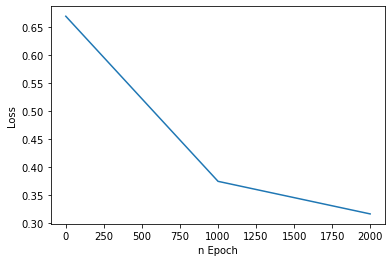

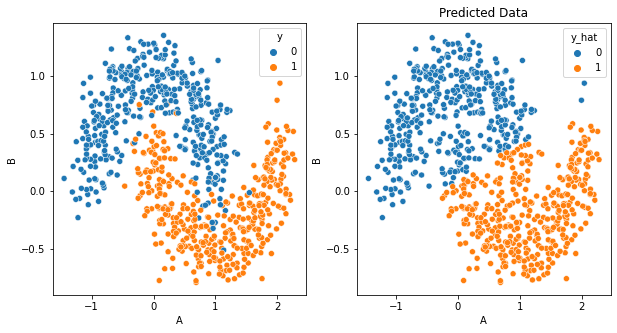

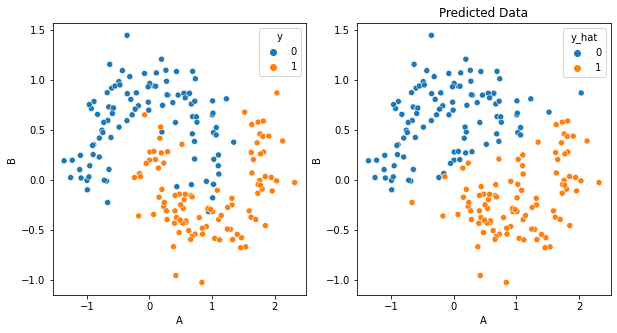

KeyboardInterrupt: Interrupted by user

In [142]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=2
NN_Hidden_A2=2

lr=0.01
lambda_=0.01
Epoch=2000
Main()

##  Main Function
### Parameters and Result

In [51]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=2
NN_Hidden_A2=2

lr=0.01
lambda_=0.01
Epoch=2000

In [62]:
def Main():

    model,proba=Train_Model(NN_Hidden_A1,NN_Hidden_A2,train.iloc[:,:-1],train.iloc[:,-1],Epoch,True)
    print("Loss Graph")
    Show_Loss_Graph(loss_dict)
    print("Training Data")
    train_y_pred,train_acc=Calculate_Accuracy(model,train)
    print("Testing Data")
    test_y_pred,test_acc=Calculate_Accuracy(model,test)
    
    Plot_Compare(train_y_pred)
    Plot_Compare(test_y_pred)

    Save_Result(NN_Hidden_A1,lr,lambda_,Epoch,train_acc,test_acc)

Loss after 0 epoch is 0.669918
Loss after 1000 epoch is 0.374166
Loss after 1999 epoch is 0.315799
Loss Graph
Starting Loss :  0.6699182252844365
Ending Loss : 0.3157987831577277
Training Data
Accuracy :  0.87
Testing Data
Accuracy :  0.86


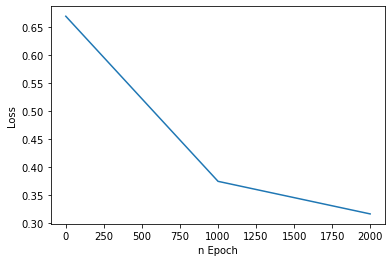

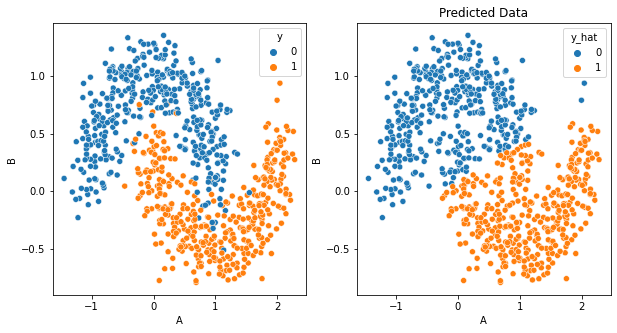

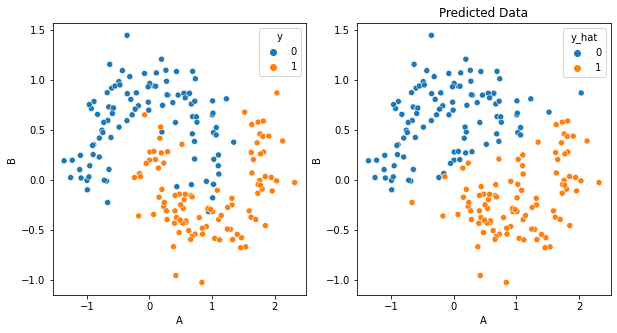

Please Enter Remark : Testing
Data Saved


In [63]:
Main()

### Parameters and Result

Loss after 0 epoch is 0.669918
Loss after 1000 epoch is 0.374166
Loss after 2000 epoch is 0.315776
Loss after 3000 epoch is 0.303413
Loss after 4000 epoch is 0.299671
Loss after 5000 epoch is 0.298172
Loss after 6000 epoch is 0.297439
Loss after 7000 epoch is 0.297024
Loss after 8000 epoch is 0.296759
Loss after 9000 epoch is 0.296576
Loss after 9999 epoch is 0.296439
Loss Graph
Starting Loss :  0.6699182252844365
Ending Loss : 0.29643877239110106
Training Data
Accuracy :  0.875
Testing Data
Accuracy :  0.855


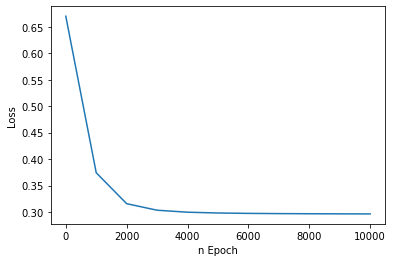

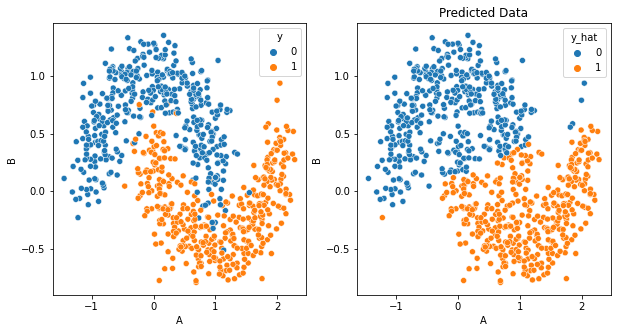

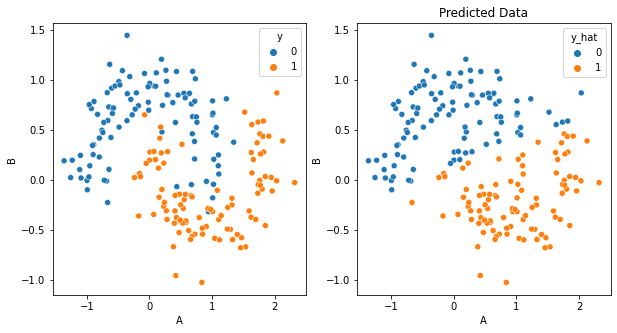

Please Enter Remark : epoch increase to 10000
Data Saved


In [65]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=2
NN_Hidden_A2=2

lr=0.01
lambda_=0.01
Epoch=10000

Main()

### Parameters and Result

Loss after 0 epoch is 0.492857
Loss after 1000 epoch is 0.302731
Loss after 2000 epoch is 0.292925
Loss after 3000 epoch is 0.291005
Loss after 3999 epoch is 0.290460
Loss Graph
Starting Loss :  0.492856633590841
Ending Loss : 0.29045989676595974
Training Data
Accuracy :  0.8775
Testing Data
Accuracy :  0.855


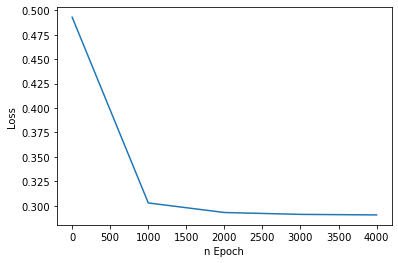

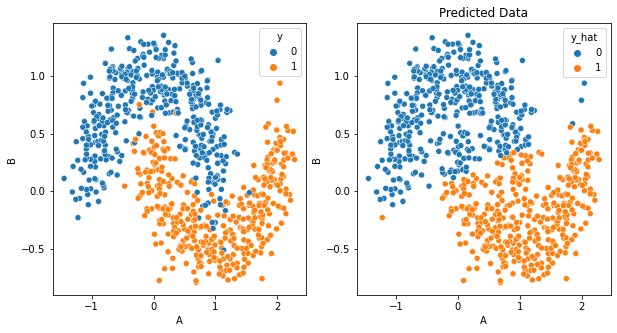

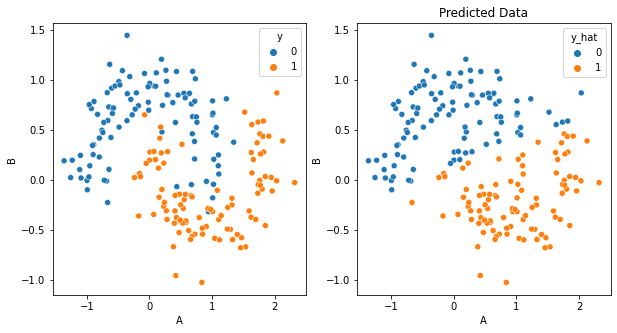

Please Enter Remark : Increase Hidden unit 2->4
Data Saved


In [67]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=4
NN_Hidden_A2=2

lr=0.01
lambda_=0.01
Epoch=4000

Main()

### Parameters and Result

Loss after 0 epoch is 0.641960
Loss after 1000 epoch is 0.342627
Loss after 2000 epoch is 0.305945
Loss after 3000 epoch is 0.295629
Loss after 4000 epoch is 0.292010
Loss after 5000 epoch is 0.290501
Loss after 6000 epoch is 0.289792
Loss after 7000 epoch is 0.289434
Loss after 7999 epoch is 0.289244
Loss Graph
Starting Loss :  0.6419596975241201
Ending Loss : 0.2892443656993584
Training Data
Accuracy :  0.8775
Testing Data
Accuracy :  0.855


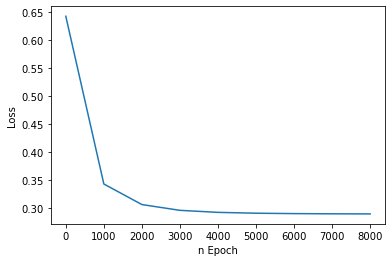

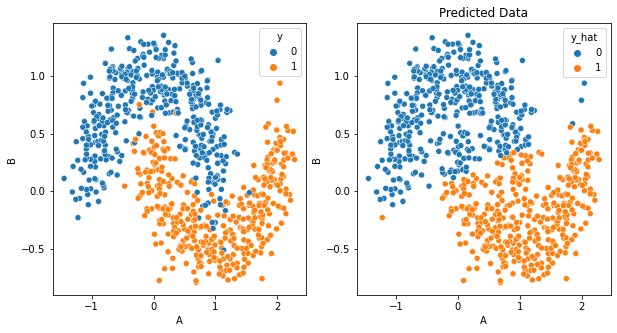

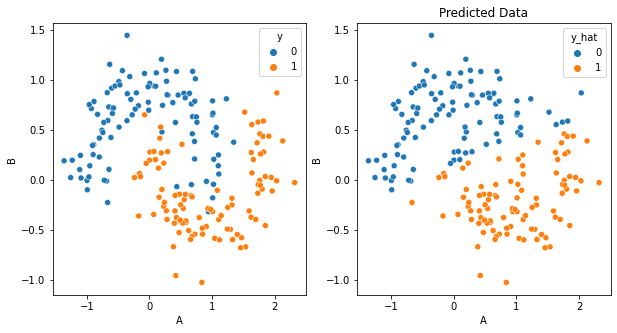

Please Enter Remark : Tunning
Data Saved


In [81]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=6
NN_Hidden_A2=2

lr=0.005
lambda_=0.01
Epoch=8000

Main()

### Parameters and Result

Loss after 0 epoch is 0.619365
Loss after 1000 epoch is 0.305023
Loss after 2000 epoch is 0.288324
Loss after 3000 epoch is 0.285680
Loss after 4000 epoch is 0.284260
Loss after 5000 epoch is 0.282467
Loss after 6000 epoch is 0.279569
Loss after 7000 epoch is 0.274575
Loss after 7999 epoch is 0.266245
Loss Graph
Starting Loss :  0.6193647974090628
Ending Loss : 0.26624531014122615
Training Data
Accuracy :  0.88375
Testing Data
Accuracy :  0.845


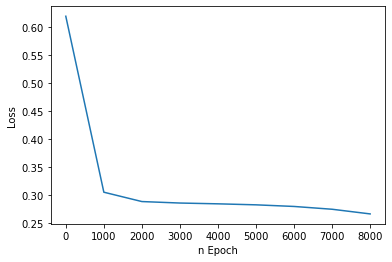

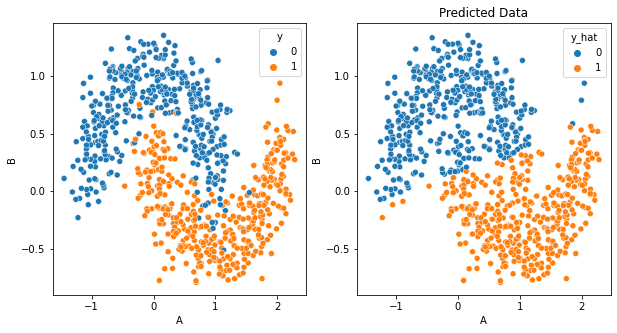

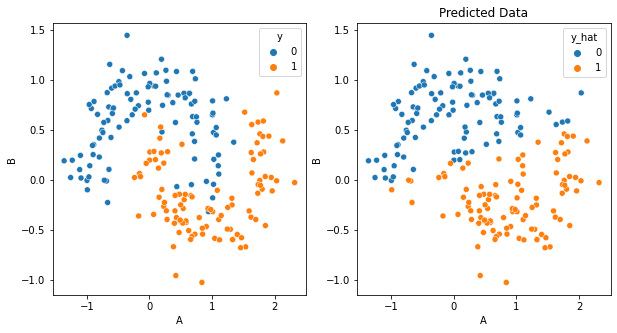

Please Enter Remark : set lambda_=0
Data Saved


In [85]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=8
NN_Hidden_A2=2

lr=0.01
lambda_=0
Epoch=8000

Main()

### Parameters and Result

Loss after 0 epoch is 0.490645
Loss after 1000 epoch is 0.288951
Loss after 2000 epoch is 0.287054
Loss after 3000 epoch is 0.286453
Loss after 4000 epoch is 0.285996
Loss after 5000 epoch is 0.285375
Loss after 6000 epoch is 0.284031
Loss after 7000 epoch is 0.280144
Loss after 8000 epoch is 0.268024
Loss after 9000 epoch is 0.241134
Loss after 10000 epoch is 0.208408
Loss after 11000 epoch is 0.181643
Loss after 12000 epoch is 0.161627
Loss after 13000 epoch is 0.145992
Loss after 14000 epoch is 0.133169
Loss after 15000 epoch is 0.122605
Loss after 16000 epoch is 0.114022
Loss after 17000 epoch is 0.107095
Loss after 18000 epoch is 0.101510
Loss after 19000 epoch is 0.097009
Loss after 19999 epoch is 0.093385
Loss Graph
Starting Loss :  0.4906448756950059
Ending Loss : 0.09338513502637696
Training Data
Accuracy :  0.9725
Testing Data
Accuracy :  0.955


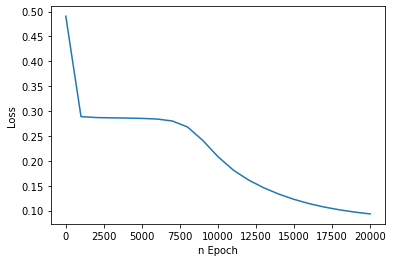

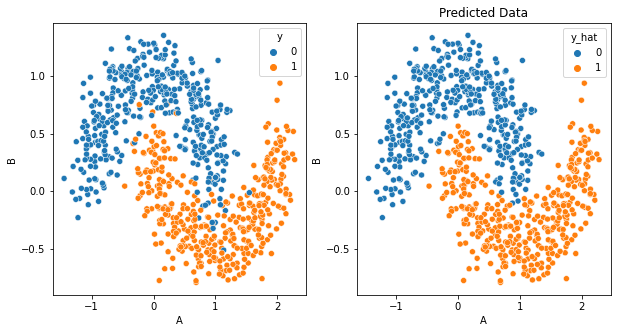

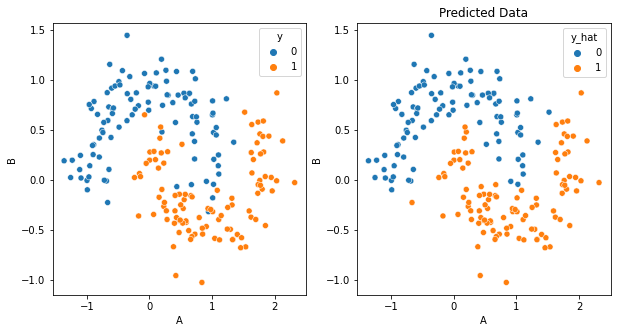

Please Enter Remark : Final Model
Data Saved


In [88]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=4
NN_Hidden_A2=2

lr=0.02
lambda_=0
Epoch=20000

Main()

### Parameters and Result

Loss after 0 epoch is 0.484241
Loss after 1000 epoch is 0.286712
Loss after 2000 epoch is 0.285365
Loss after 3000 epoch is 0.275521
Loss after 4000 epoch is 0.208026
Loss after 5000 epoch is 0.153199
Loss after 6000 epoch is 0.122489
Loss after 7000 epoch is 0.104084
Loss after 8000 epoch is 0.093341
Loss after 9000 epoch is 0.087072
Loss after 10000 epoch is 0.083355
Loss after 11000 epoch is 0.081076
Loss after 12000 epoch is 0.079615
Loss after 13000 epoch is 0.078637
Loss after 14000 epoch is 0.077953
Loss after 15000 epoch is 0.077454
Loss after 16000 epoch is 0.077077
Loss after 17000 epoch is 0.076783
Loss after 18000 epoch is 0.076546
Loss after 19000 epoch is 0.076349
Loss after 20000 epoch is 0.076183
Loss after 21000 epoch is 0.076040
Loss after 22000 epoch is 0.075914
Loss after 23000 epoch is 0.075801
Loss after 24000 epoch is 0.075700
Loss after 25000 epoch is 0.075608
Loss after 26000 epoch is 0.075524
Loss after 27000 epoch is 0.075446
Loss after 28000 epoch is 0.07537

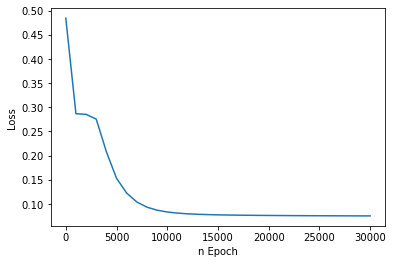

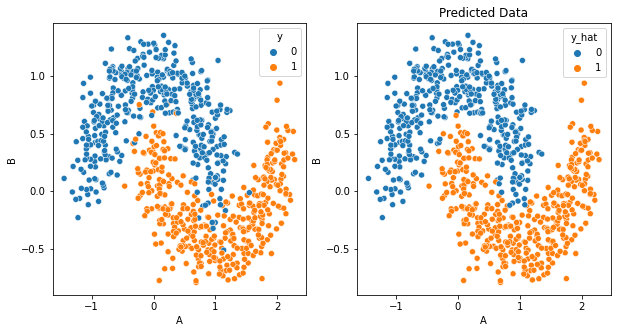

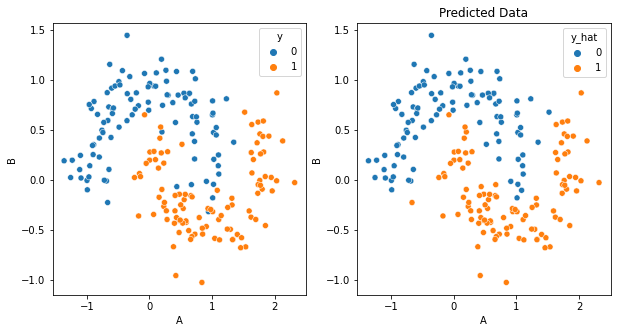

Please Enter Remark : Testing Accuracy Increase
Data Saved


In [91]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=4
NN_Hidden_A2=2

lr=0.05
lambda_=0
Epoch=30000

Main()

# Final Result 

In [96]:
Result_df

,Dimention of hidden layer,Learning Rate,Regularization,n_Epoch,Train_Accuracy,Test Accuracy,Comment
0,2,0.010,0.01,2000,0.87000,0.860,Testing
1,2,0.010,0.01,10000,0.87500,0.855,epoch increase to 10000
2,4,0.010,0.01,4000,0.87750,0.855,Increase Hidden unit 2->4
3,6,0.005,0.01,8000,0.87750,0.855,Tunning
4,8,0.010,0.00,8000,0.88375,0.845,set lambda_=0
5,4,0.020,0.00,20000,0.97250,0.955,Final Model
6,4,0.050,0.00,30000,0.97500,0.960,Testing Accuracy Increase
